# Titreringsdata

I denna uppgift så ska vi rita lite grafer som visar på hur en kiselytas laddning påverkas av både pH, salttyp och salthalt. I nedanstående fall har vi experimental data för ytladdningen vid olika pH och olika koncentrationer av natriumklorid (NaCl, ett 1:1 salt). I det andra fallet samma ytan men med olika koncentrationer av kalciumklorid (CaCl<sub>2</sub>, ett 2:1 salt). Vi har även en teoridata för samma fall som också läses in.

Datan är pH mot ytladdning (i enheterna mC/m$^2$)

Experimental datan är från: **P. M. Dove and C. M. Craven, Geochim. Cosmochim. Acta 69, 4963 (2005)** ([länk](https://www.sciencedirect.com/science/article/pii/S001670370500428X?casa_token=kQMsxhGCt5YAAAAA:4W3TIa4wBp8nDkD4YyXXmLMThkgqWG-56gGg5DAsZrBuf00FPMIot-z2j689QrSdYscSPcYi0cA))

Teori data är från: **M. Trulsson, Langmuir XXXX, XXX, XXX-XXX (2023)** ([länk](https://pubs.acs.org/doi/10.1021/acs.langmuir.3c00316))

In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Läs in experimental data
pH_11_67mM_exp = [3.023, 3.027, 3.028, 3.033, 3.152, 3.155, 3.16, 3.16, 3.162, 3.242, 3.244, 3.247, 3.325, 3.347, 3.352, 3.353, 3.487, 3.493, 3.495, 3.578, 3.586, 3.587, 3.597, 3.603, 3.617, 3.692, 3.699, 3.702, 3.844, 3.848, 3.854, 3.855, 4.041, 4.057, 4.069, 4.075, 4.319, 4.338, 4.37, 4.38, 4.395, 4.397, 4.402, 4.407, 4.421, 4.776, 5.144, 5.178, 5.205, 5.44, 5.461, 5.492, 5.671, 5.701, 5.708, 5.862, 5.885, 5.891, 6.024, 6.044, 6.053, 6.171, 6.182, 6.2, 6.302, 6.311, 6.32, 6.42, 6.428, 6.437, 6.53, 6.534, 6.543, 6.626, 6.63, 6.645, 6.8, 6.811, 6.821, 6.965, 6.966, 6.979, 7.106, 7.11, 7.123, 7.238, 7.239, 7.253, 7.334, 7.358, 7.372, 7.47, 7.482, 7.494, 7.574, 7.583, 7.673, 7.678, 7.767, 7.848, 7.851, 7.938, 8.006, 8.01, 8.083, 8.145, 8.151, 8.217, 8.278, 8.28, 8.342, 8.394, 8.397, 8.455, 8.498, 8.506]
sigma_11_67mM_exp = [-0.4, -0.2, -0.1, -0.4, -0.5, -0.4, -0.2, -0.2, 0.0, -0.3, -0.2, -0.1, -0.3, -0.4, -0.2, -0.2, -0.4, -0.3, -0.2, -0.4, -0.3, -0.3, -0.7, -0.4, 0.0, -0.5, -0.3, -0.3, -0.5, -0.5, -0.4, -0.4, -0.7, -0.7, -0.7, -0.6, -1.4, -1.0, -0.8, -1.2, -1.2, -1.2, -1.2, -1.2, -1.1, -1.9, -3.7, -3.4, -3.3, -5.5, -5.1, -5.0, -7.2, -6.8, -6.8, -9.0, -8.6, -8.6, -10.9, -10.4, -10.4, -12.7, -12.2, -12.3, -14.5, -14.0, -14.1, -16.3, -15.8, -15.9, -18.2, -17.6, -17.7, -20.0, -19.4, -19.6, -23.7, -23.0, -23.2, -26.6, -27.3, -26.9, -31.0, -30.2, -30.6, -34.7, -33.8, -34.2, -37.4, -38.3, -37.9, -42.0, -41.6, -44.6, -45.6, -45.2, -49.3, -51.8, -52.5, -56.6, -59.1, -59.8, -63.9, -66.3, -67.2, -73.5, -71.2, -74.5, -78.5, -80.7, -81.8, -85.8, -87.8, -89.1, -95.0, -93.1]
pH_11_200mM_exp = [3.013, 3.04, 3.045, 3.046, 3.069, 3.137, 3.172, 3.18, 3.195, 3.216, 3.257, 3.266, 3.286, 3.309, 3.363, 3.372, 3.389, 3.396, 3.429, 3.502, 3.504, 3.514, 3.529, 3.593, 3.594, 3.604, 3.703, 3.707, 3.719, 3.722, 3.727, 3.754, 3.852, 3.854, 3.866, 4.058, 4.06, 4.064, 4.067, 4.07, 4.143, 4.358, 4.358, 4.359, 4.364, 4.37, 4.371, 4.373, 4.386, 4.419, 4.777, 4.812, 4.839, 5.1, 5.144, 5.184, 5.358, 5.423, 5.456, 5.565, 5.619, 5.651, 5.732, 5.788, 5.815, 5.879, 5.93, 5.948, 6.002, 6.051, 6.068, 6.114, 6.163, 6.175, 6.222, 6.263, 6.278, 6.315, 6.354, 6.444, 6.457, 6.486, 6.52, 6.609, 6.64, 6.674, 6.753, 6.782, 6.81, 6.878, 6.91, 6.924, 6.996, 7.03, 7.039, 7.106, 7.145, 7.147, 7.208, 7.247, 7.258, 7.345, 7.35, 7.395, 7.434, 7.512, 7.522, 7.561, 7.669, 7.674, 7.713, 7.811, 7.823, 7.855, 7.948, 7.965, 7.99, 8.071, 8.088, 8.11, 8.181, 8.203, 8.222, 8.288, 8.32, 8.333, 8.389, 8.42, 8.43, 8.484, 8.577, 8.592, 8.606, 8.655, 8.763]
sigma_11_200mM_exp = [0.1, 0.1, 1.4, 0.4, 1.2, 0.1, 0.0, 0.3, 0.7, 0.1, -0.1, 0.2, -1.0, 0.0, -0.1, 0.1, 0.7, 0.9, -0.1, -0.2, -0.2, 0.0, -1.1, -0.3, -0.3, -0.1, -0.4, -0.4, -0.2, 0.4, -1.3, 0.8, -0.5, -0.5, -0.4, -0.8, -0.8, 0.0, -1.7, -0.7, 0.5, -2.1, -1.3, -1.3, -1.3, -1.3, -1.3, -1.3, -0.4, -0.2, -3.1, -1.4, -1.3, -2.9, -4.6, -2.9, -4.6, -6.3, -4.6, -6.3, -8.0, -6.4, -8.1, -9.8, -8.1, -9.9, -11.6, -9.9, -11.7, -13.4, -11.7, -13.5, -15.2, -13.5, -15.3, -17.0, -15.3, -17.1, -18.8, -20.6, -18.9, -20.7, -22.4, -22.5, -24.3, -26.0, -26.1, -27.9, -29.6, -29.8, -31.5, -33.2, -33.4, -35.1, -36.8, -37.0, -40.4, -38.7, -40.6, -44.0, -42.3, -47.6, -45.9, -47.8, -51.2, -54.9, -53.1, -55.0, -62.1, -60.3, -62.2, -69.3, -67.6, -69.4, -76.5, -74.8, -76.6, -83.7, -82.0, -83.8, -90.9, -89.2, -91.0, -98.1, -96.4, -98.2, -105.3, -103.5, -105.4, -112.5, -119.6, -117.9, -119.8, -126.8, -134.1]
pH_11_1000mM_exp = [4.0, 4.75, 5.03, 5.25, 5.52, 5.77, 5.8, 6.0, 6.1, 6.5, 7.0, 7.5, 8.0, 8.5]
sigma_11_1000mM_exp = [-0.801, -3.204, -3.5244, -8.1702, -5.1264, -10.5732, -16.02, -17.622, -21.627, -34.443, -54.468, -80.1, -115.0236, -157.70088]
pH_21_67mM_exp = [4.2, 4.7, 5.2, 5.7, 6.2, 6.7, 7.2, 7.7, 8.2, 8.7, 9.2]
sigma_21_67mM_exp = [-0.25762894, -1.3696631, -2.4816972, -6.8444702, -16.079122, -33.194912, -61.588697, -103.71526, -157.11366, -220.788, -289.40804]
pH_21_1000mM_exp = [4.2, 4.7, 5.2, 5.7, 6.2, 6.7, 7.2, 7.7, 8.2, 8.7, 9.2]
sigma_21_1000mM_exp = [-0.3068476, -1.7910979, -3.2753482, -9.4207596, -24.439373, -51.425043, -93.033269, -146.69392, -208.97936, -277.00494, -347.47991]

In [3]:
# Läs in teori data
pH_11_67mM_teori = [9.0, 8.94949494949495, 8.8989898989899, 8.848484848484848, 8.797979797979798, 8.747474747474747, 8.696969696969697, 8.646464646464647, 8.595959595959595, 8.545454545454545, 8.494949494949495, 8.444444444444445, 8.393939393939394, 8.343434343434343, 8.292929292929292, 8.242424242424242, 8.191919191919192, 8.141414141414142, 8.090909090909092, 8.04040404040404, 7.98989898989899, 7.9393939393939394, 7.888888888888889, 7.838383838383838, 7.787878787878788, 7.737373737373737, 7.686868686868687, 7.636363636363637, 7.585858585858586, 7.5353535353535355, 7.484848484848484, 7.434343434343434, 7.383838383838384, 7.333333333333333, 7.282828282828283, 7.232323232323232, 7.181818181818182, 7.1313131313131315, 7.080808080808081, 7.03030303030303, 6.979797979797979, 6.929292929292929, 6.878787878787879, 6.828282828282829, 6.777777777777778, 6.7272727272727275, 6.6767676767676765, 6.626262626262626, 6.575757575757576, 6.525252525252525, 6.474747474747475, 6.424242424242424, 6.373737373737374, 6.3232323232323235, 6.272727272727273, 6.222222222222222, 6.171717171717171, 6.121212121212121, 6.070707070707071, 6.020202020202021, 5.96969696969697, 5.919191919191919, 5.8686868686868685, 5.818181818181818, 5.767676767676768, 5.717171717171717, 5.666666666666666, 5.616161616161616, 5.565656565656566, 5.515151515151516, 5.4646464646464645, 5.414141414141414, 5.363636363636363, 5.313131313131313, 5.262626262626263, 5.212121212121213, 5.161616161616162, 5.111111111111111, 5.0606060606060606, 5.01010101010101, 4.959595959595959, 4.909090909090909, 4.858585858585859, 4.808080808080808, 4.757575757575758, 4.707070707070707, 4.656565656565657, 4.606060606060606, 4.555555555555555, 4.505050505050505, 4.454545454545455, 4.404040404040404, 4.353535353535354, 4.303030303030303, 4.252525252525253, 4.202020202020202, 4.151515151515151, 4.101010101010101, 4.05050505050505, 4.0]
sigma_11_67mM_teori = [-116.23236592655414, -113.02078822187802, -109.86454527794493, -106.7637298413522, -103.71839616416091, -100.7285592770711, -97.7941943779761, -94.91523634149685, -92.09157935491763, -89.3230766857029, -86.60954058547529, -83.95074233499547, -81.34641243430423, -78.79624094178614, -76.29987796549824, -73.85693430968851, -71.46698227902122, -69.12955664263531, -66.84415575980186, -64.61024286862246, -62.4272475389263, -60.29456729028252, -58.21156937584514, -56.17759273257446, -54.191950098225554, -52.25393029532899, -50.36280068218333, -48.51780977058336, -46.718190009570044, -44.96316073383205, -43.25193127443191, -41.58370422817511, -39.95767888007379, -38.373054770868634, -36.82903539833957, -35.32483203705768, -33.85966765622518, -32.43278090927803, -31.04343016202104, -29.690897518342236, -28.374492794251147, -27.09355738246602, -25.84746794154608, -24.63563983625062, -23.457530250114075, -22.312640887861075, -21.200520184832996, -20.120764943384497, -19.073021322137155, -18.05698511241312, -17.0724012458799, -16.11906248667879, -15.196807268094584, -14.30551663636609, -13.445110261566938, -12.615541468102323, -11.81679122778769, -11.048861051444058, -10.311764717135311, -9.60551879224405, -8.930131949639526, -8.285593149853659, -7.671858861652132, -7.088839617014256, -6.536386331346733, -6.014276948315686, -5.522204070332719, -5.059764289975757, -4.626449928056674, -4.221643802012206, -3.8446174954323356, -3.4945333884792773, -3.1704504618369853, -2.8713336318815097, -2.596066141524713, -2.343464345564311, -2.112294109528892, -1.9012879949675343, -1.7091624295223065, -1.5346341458056463, -1.3764353021548377, -1.233326851484683, -1.1041098832653748, -0.9876348128372676, -0.8828084210001306, -0.7885988489515564, -0.7040387272770265, -0.6282266641509647, -0.560327340688196, -0.4995704651022534, -0.44524882688039413, -0.3967156721729092, -0.353381595965446, -0.3147111185067655, -0.2802190852386126, -0.24946700272304906, -0.2220593987771054, -0.19764027371828585, -0.1758896914608319, -0.15652054410600896]
pH_11_200mM_teori = [9.0, 8.94949494949495, 8.8989898989899, 8.848484848484848, 8.797979797979798, 8.747474747474747, 8.696969696969697, 8.646464646464647, 8.595959595959595, 8.545454545454545, 8.494949494949495, 8.444444444444445, 8.393939393939394, 8.343434343434343, 8.292929292929292, 8.242424242424242, 8.191919191919192, 8.141414141414142, 8.090909090909092, 8.04040404040404, 7.98989898989899, 7.9393939393939394, 7.888888888888889, 7.838383838383838, 7.787878787878788, 7.737373737373737, 7.686868686868687, 7.636363636363637, 7.585858585858586, 7.5353535353535355, 7.484848484848484, 7.434343434343434, 7.383838383838384, 7.333333333333333, 7.282828282828283, 7.232323232323232, 7.181818181818182, 7.1313131313131315, 7.080808080808081, 7.03030303030303, 6.979797979797979, 6.929292929292929, 6.878787878787879, 6.828282828282829, 6.777777777777778, 6.7272727272727275, 6.6767676767676765, 6.626262626262626, 6.575757575757576, 6.525252525252525, 6.474747474747475, 6.424242424242424, 6.373737373737374, 6.3232323232323235, 6.272727272727273, 6.222222222222222, 6.171717171717171, 6.121212121212121, 6.070707070707071, 6.020202020202021, 5.96969696969697, 5.919191919191919, 5.8686868686868685, 5.818181818181818, 5.767676767676768, 5.717171717171717, 5.666666666666666, 5.616161616161616, 5.565656565656566, 5.515151515151516, 5.4646464646464645, 5.414141414141414, 5.363636363636363, 5.313131313131313, 5.262626262626263, 5.212121212121213, 5.161616161616162, 5.111111111111111, 5.0606060606060606, 5.01010101010101, 4.959595959595959, 4.909090909090909, 4.858585858585859, 4.808080808080808, 4.757575757575758, 4.707070707070707, 4.656565656565657, 4.606060606060606, 4.555555555555555, 4.505050505050505, 4.454545454545455, 4.404040404040404, 4.353535353535354, 4.303030303030303, 4.252525252525253, 4.202020202020202, 4.151515151515151, 4.101010101010101, 4.05050505050505, 4.0]
sigma_11_200mM_teori = [-147.6613380896638, -143.89662834885306, -140.18265231172492, -136.51977207026863, -132.9083191529773, -129.34859346088174, -125.84086227149508, -122.38535932154059, -118.98228397994603, -115.63180052316376, -112.33403752541503, -109.08908737695322, -105.89700594387985, -102.75781238342343, -99.67148912889076, -96.63798205869794, -93.65720086398058, -90.72901962922104, -87.85327764010356, -85.02978043236288, -82.25830109469106, -79.53858183774261, -76.87033583988391, -74.25324937847176, -71.68698425305676, -69.17118050388986, -66.70545942538526, -64.28942686967059, -61.92267682997736, -59.60479528734298, -57.33536429692082, -55.11396628218592, -52.94018849662716, -50.81362760337656, -48.733894313997205, -46.70061801881307, -44.713451333304704, -42.77207447888016, -40.87619941245806, -39.025573618383326, -37.21998347866981, -35.45925714350471, -33.7432668329377, -32.07193051164584, -30.44521288982967, -28.863125712199142, -27.325727300714046, -25.833121312258626, -24.385454657299316, -22.982914498673487, -21.62572421200413, -20.31413814472164, -19.048434966452973, -17.828909369870782, -16.65586187050739, -15.529586479670044, -14.450356097903786, -13.418405604487253, -12.433912801194653, -11.496977596858992, -10.607600073987085, -9.765658331526971, -8.970887214277813, -8.22285918314496, -7.520968619666782, -6.864420771910554, -6.252226331961697, -5.683202301811953, -5.15597938692823, -4.6690157017124685, -4.220616131666337, -3.808956324207716, -3.432110013691438, -3.0880782491903265, -2.774819089507468, -2.4902764443470007, -2.2324069459672873, -1.9992039974586522, -1.7887184269528742, -1.5990754510693683, -1.4284878929497222, -1.2752657963998522, -1.1378227223274033, -1.0146791078958652, -0.9044631182826923, -0.805909433846548, -0.7178564009446764, -0.6392419412764744, -0.5690985700094697, -0.5065478231290119, -0.4507943439626529, -0.40111983077503327, -0.3568770036372933, -0.3174837104528506, -0.28241725940008316, -0.2512090380040651, -0.22343945716011399, -0.19873324113207164, -0.17675507120663309, -0.15720558067121923]
pH_11_1000mM_teori = [9.0, 8.94949494949495, 8.8989898989899, 8.848484848484848, 8.797979797979798, 8.747474747474747, 8.696969696969697, 8.646464646464647, 8.595959595959595, 8.545454545454545, 8.494949494949495, 8.444444444444445, 8.393939393939394, 8.343434343434343, 8.292929292929292, 8.242424242424242, 8.191919191919192, 8.141414141414142, 8.090909090909092, 8.04040404040404, 7.98989898989899, 7.9393939393939394, 7.888888888888889, 7.838383838383838, 7.787878787878788, 7.737373737373737, 7.686868686868687, 7.636363636363637, 7.585858585858586, 7.5353535353535355, 7.484848484848484, 7.434343434343434, 7.383838383838384, 7.333333333333333, 7.282828282828283, 7.232323232323232, 7.181818181818182, 7.1313131313131315, 7.080808080808081, 7.03030303030303, 6.979797979797979, 6.929292929292929, 6.878787878787879, 6.828282828282829, 6.777777777777778, 6.7272727272727275, 6.6767676767676765, 6.626262626262626, 6.575757575757576, 6.525252525252525, 6.474747474747475, 6.424242424242424, 6.373737373737374, 6.3232323232323235, 6.272727272727273, 6.222222222222222, 6.171717171717171, 6.121212121212121, 6.070707070707071, 6.020202020202021, 5.96969696969697, 5.919191919191919, 5.8686868686868685, 5.818181818181818, 5.767676767676768, 5.717171717171717, 5.666666666666666, 5.616161616161616, 5.565656565656566, 5.515151515151516, 5.4646464646464645, 5.414141414141414, 5.363636363636363, 5.313131313131313, 5.262626262626263, 5.212121212121213, 5.161616161616162, 5.111111111111111, 5.0606060606060606, 5.01010101010101, 4.959595959595959, 4.909090909090909, 4.858585858585859, 4.808080808080808, 4.757575757575758, 4.707070707070707, 4.656565656565657, 4.606060606060606, 4.555555555555555, 4.505050505050505, 4.454545454545455, 4.404040404040404, 4.353535353535354, 4.303030303030303, 4.252525252525253, 4.202020202020202, 4.151515151515151, 4.101010101010101, 4.05050505050505, 4.0]
sigma_11_1000mM_teori = [-197.4101799894636, -192.89460054043474, -188.4159939417741, -183.9750013544958, -179.57225200484814, -175.20836313343665, -170.88394001051142, -166.59957602530977, -162.35585285751074, -158.15334073890133, -153.99259881325952, -149.87417560221132, -145.79860958439806, -141.76642989467865, -137.77815714929272, -133.8343044019066, -129.9353782342798, -126.08187998392704, -122.27430710965506, -118.51315469427492, -114.79891708218784, -111.13208964801612, -107.51317069110402, -103.94266344966529, -100.42107822774574, -96.94893462812544, -93.52676388492803, -90.1551112911016, -86.83453871810595, -83.56562722798478, -80.34897978128667, -77.18522404761497, -74.07501532828044, -71.01903960172274, -68.0180167008731, -65.0727036260338, -62.18389798550154, -59.352441537291604, -56.57922377720689, -53.865185479637496, -51.21132204691622, -48.61868646066622, -46.088391555458806, -43.6216112539292, -41.219580317879235, -38.883592088614556, -36.61499362088647, -34.41517756958953, -32.28557017981305, -30.227614772933137, -28.242750227787592, -26.332384138062036, -24.497860591734803, -22.740422865327535, -21.061171744078063, -19.46102064554167, -17.940649201127794, -16.50045738724339, -15.14052263549115, -13.860562528439337, -12.659905651022896, -11.537472885021149, -10.491770903305579, -9.520898876509603, -8.62256851831837, -7.7941366647466115, -7.032648716959925, -6.334890577857389, -5.697446255240112, -5.116758126149884, -4.589186953133997, -4.111069072189866, -3.6787686672367945, -3.288723629916243, -2.9374841024219545, -2.6217433545608793, -2.33836111300466, -2.084379819222211, -1.8570345386758158, -1.653757386122961, -1.472177386779114, -1.310116680601242, -1.1655839170680538, -1.0367655984674433, -0.9220160255160588, -0.8198463912224562, -0.7289134649917614, -0.648008213920147, -0.5760446246491826, -0.5120489179949993, -0.45514928965892154, -0.404566262784666, -0.35960370069155373, -0.31964049936858674, -0.2841229578454188, -0.25255780903651176, -0.22450588290129178, -0.1995763667505323, -0.17742162339737305, -0.15773252589074468]
pH_21_67mM_teori = [9.0, 8.94949494949495, 8.8989898989899, 8.848484848484848, 8.797979797979798, 8.747474747474747, 8.696969696969697, 8.646464646464647, 8.595959595959595, 8.545454545454545, 8.494949494949495, 8.444444444444445, 8.393939393939394, 8.343434343434343, 8.292929292929292, 8.242424242424242, 8.191919191919192, 8.141414141414142, 8.090909090909092, 8.04040404040404, 7.98989898989899, 7.9393939393939394, 7.888888888888889, 7.838383838383838, 7.787878787878788, 7.737373737373737, 7.686868686868687, 7.636363636363637, 7.585858585858586, 7.5353535353535355, 7.484848484848484, 7.434343434343434, 7.383838383838384, 7.333333333333333, 7.282828282828283, 7.232323232323232, 7.181818181818182, 7.1313131313131315, 7.080808080808081, 7.03030303030303, 6.979797979797979, 6.929292929292929, 6.878787878787879, 6.828282828282829, 6.777777777777778, 6.7272727272727275, 6.6767676767676765, 6.626262626262626, 6.575757575757576, 6.525252525252525, 6.474747474747475, 6.424242424242424, 6.373737373737374, 6.3232323232323235, 6.272727272727273, 6.222222222222222, 6.171717171717171, 6.121212121212121, 6.070707070707071, 6.020202020202021, 5.96969696969697, 5.919191919191919, 5.8686868686868685, 5.818181818181818, 5.767676767676768, 5.717171717171717, 5.666666666666666, 5.616161616161616, 5.565656565656566, 5.515151515151516, 5.4646464646464645, 5.414141414141414, 5.363636363636363, 5.313131313131313, 5.262626262626263, 5.212121212121213, 5.161616161616162, 5.111111111111111, 5.0606060606060606, 5.01010101010101, 4.959595959595959, 4.909090909090909, 4.858585858585859, 4.808080808080808, 4.757575757575758, 4.707070707070707, 4.656565656565657, 4.606060606060606, 4.555555555555555, 4.505050505050505, 4.454545454545455, 4.404040404040404, 4.353535353535354, 4.303030303030303, 4.252525252525253, 4.202020202020202, 4.151515151515151, 4.101010101010101, 4.05050505050505, 4.0]
sigma_21_67mM_teori = [-250.79057526875766, -243.8877336799235, -237.03806026094503, -230.24488123989946, -223.5115750247617, -216.84156654368905, -210.23832051078384, -203.7053335625706, -197.24612522016616, -190.86422764471186, -184.5631741692764, -178.34648660929992, -172.21766137576495, -166.18015444062354, -160.23736523237883, -154.39261957079677, -148.64915178300274, -143.01008617802006, -137.4784180923015, -132.05699475398188, -126.7484962473067, -121.55541688973179, -116.48004736128563, -111.52445794763082, -106.69048327368007, -101.97970891248113, -97.39346025342938, -92.93279400383518, -88.59849267769681, -84.39106239436242, -80.31073426651368, -76.35746959992639, -72.53096905418163, -68.83068582002427, -65.2558427497683, -61.80545322455024, -58.478345347310345, -55.27318880385022, -52.188523429520465, -49.22278815710931, -46.374348619138544, -43.641521278018445, -41.022591640528546, -38.51582400250675, -36.119460425412406, -33.83170743324666, -31.650710341800366, -29.574517149579673, -27.601036256140738, -25.727994400673847, -23.95290244893798, -22.273036394540718, -20.68543893994259, -19.18694359866799, -17.774219242670945, -16.44382945989857, -15.192298861228675, -14.016177980233339, -12.91209950039277, -11.876820705497313, -10.907249615223796, -10.000454715170498, -9.153660136861115, -8.364229440357219, -7.629641816568337, -6.947464628932278, -6.315325885727466, -5.730889605098523, -5.191836229877647, -4.695849381026295, -4.240609403336878, -3.8237934310829766, -3.4430811368849694, -3.0961649505676943, -2.780763347536846, -2.4946357883191252, -2.2355980076558675, -2.0015365606958304, -1.7904217927393866, -1.6003186700630663, -1.4293951635183726, -1.2759280945511353, -1.1383065250384075, -1.0150328955933765, -0.9047221950005755, -0.8060994828541126, -0.7179960964496446, -0.6393448598310454, -0.5691745851513422, -0.5066041204586232, -0.4508361585341748, -0.4011509820073404, -0.3569002829829311, -0.3175011622230432, -0.2824303841847295, -0.25121894007654627, -0.2234469513719465, -0.1987389305165525, -0.17675940339910065, -0.1572088890002663]
pH_21_1000mM_teori = [9.0, 8.94949494949495, 8.8989898989899, 8.848484848484848, 8.797979797979798, 8.747474747474747, 8.696969696969697, 8.646464646464647, 8.595959595959595, 8.545454545454545, 8.494949494949495, 8.444444444444445, 8.393939393939394, 8.343434343434343, 8.292929292929292, 8.242424242424242, 8.191919191919192, 8.141414141414142, 8.090909090909092, 8.04040404040404, 7.98989898989899, 7.9393939393939394, 7.888888888888889, 7.838383838383838, 7.787878787878788, 7.737373737373737, 7.686868686868687, 7.636363636363637, 7.585858585858586, 7.5353535353535355, 7.484848484848484, 7.434343434343434, 7.383838383838384, 7.333333333333333, 7.282828282828283, 7.232323232323232, 7.181818181818182, 7.1313131313131315, 7.080808080808081, 7.03030303030303, 6.979797979797979, 6.929292929292929, 6.878787878787879, 6.828282828282829, 6.777777777777778, 6.7272727272727275, 6.6767676767676765, 6.626262626262626, 6.575757575757576, 6.525252525252525, 6.474747474747475, 6.424242424242424, 6.373737373737374, 6.3232323232323235, 6.272727272727273, 6.222222222222222, 6.171717171717171, 6.121212121212121, 6.070707070707071, 6.020202020202021, 5.96969696969697, 5.919191919191919, 5.8686868686868685, 5.818181818181818, 5.767676767676768, 5.717171717171717, 5.666666666666666, 5.616161616161616, 5.565656565656566, 5.515151515151516, 5.4646464646464645, 5.414141414141414, 5.363636363636363, 5.313131313131313, 5.262626262626263, 5.212121212121213, 5.161616161616162, 5.111111111111111, 5.0606060606060606, 5.01010101010101, 4.959595959595959, 4.909090909090909, 4.858585858585859, 4.808080808080808, 4.757575757575758, 4.707070707070707, 4.656565656565657, 4.606060606060606, 4.555555555555555, 4.505050505050505, 4.454545454545455, 4.404040404040404, 4.353535353535354, 4.303030303030303, 4.252525252525253, 4.202020202020202, 4.151515151515151, 4.101010101010101, 4.05050505050505, 4.0]
sigma_21_1000mM_teori = [-328.9358797931085, -321.423627608503, -313.91906425559677, -306.4241463050338, -298.94086459494116, -291.4712481061702, -284.0173683557709, -276.5813444754747, -269.16534918301625, -261.77161590353467, -254.40244735707, -247.06022599697573, -239.74742676294827, -232.4666327002447, -225.2205540904915, -218.01205183313903, -210.844165899173, -203.7201497320914, -196.64351146719912, -189.61806273688128, -182.64797556684738, -175.73784736570386, -168.8927731661258, -162.1184229750387, -155.42112022352566, -148.80791481261448, -142.28664118306827, -135.86594846686023, -129.55528671130995, -123.36483143631229, -117.30532981601336, -111.38785708344513, -105.6234822716094, -100.02285758738262, -94.595762981239, -89.35065252815934, -84.29425730163635, -79.43129681745528, -74.76433673644208, -70.29380705803263, -66.0181689741256, -61.93419747005388, -58.03733552495412, -54.322074803141966, -50.78232433362026, -47.41173922952211, -44.20399272926939, -41.1529845813233, -38.25298609673592, -35.49872668106517, -32.885429150687926, -30.4088020967869, -28.06499768155101, -25.850542988975583, -23.762252688521983, -21.79713042402977, -19.952266012225092, -18.224735149656752, -16.61150777892958, -15.1093704608643, -13.71486698900325, -12.424260081917563, -11.233515381900663, -10.138307317736192, -9.134044825964557, -8.21591363583795, -7.378930935445932, -6.618007815444605, -5.928014927232979, -5.303847226761732, -4.740484393423945, -4.233044388208438, -3.776828525024029, -3.367357275394142, -3.0003967428436726, -2.671976295091948, -2.3783982232989884, -2.116240521955393, -1.8823539764494934, -1.6738547386957372, -1.488113494932379, -1.3227422107370808, -1.1755792981022184, -1.044673904148391, -0.9282698817300455, -0.8247898755480888, -0.7328198469036443, -0.6510942670253813, -0.5784821325413633, -0.5139738957633322, -0.45666935514430657, -0.40576651552931786, -0.36055140165258415, -0.3203887899081275, -0.2847138111178688, -0.25302436946214746, -0.22487431877582215, -0.19986733611575, -0.17765143312815376, -0.15791404770300904]

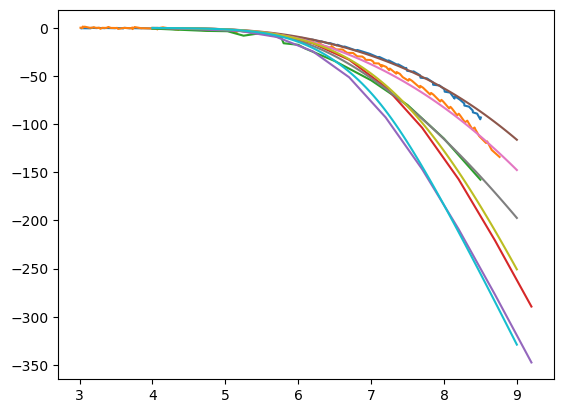

In [4]:
plt.plot(pH_11_67mM_exp,sigma_11_67mM_exp)
plt.plot(pH_11_200mM_exp,sigma_11_200mM_exp)
plt.plot(pH_11_1000mM_exp,sigma_11_1000mM_exp)

plt.plot(pH_21_67mM_exp,sigma_21_67mM_exp)
plt.plot(pH_21_1000mM_exp,sigma_21_1000mM_exp)

plt.plot(pH_11_67mM_teori,sigma_11_67mM_teori)
plt.plot(pH_11_200mM_teori,sigma_11_200mM_teori)
plt.plot(pH_11_1000mM_teori,sigma_11_1000mM_teori)

plt.plot(pH_21_67mM_teori,sigma_21_67mM_teori)
plt.plot(pH_21_1000mM_teori,sigma_21_1000mM_teori)

plt.show()

# Uppgift
Ovanstående graf är väldigt svårbegriplig (t.ex. vad är ritat och vilken kurva är vad).
Skapa en snygg graf, gärna en graf med två-i-en (antingen sida vid sida) eller som en inset.
Grafen ska ha:
* Beskrivande text/symboler på axlarna
* Legends (beskrivning vilken kurva tillhör vad)
* Använd både markers och linjer
* Använd olika färger, linjestilar, linjebredder osv.

Du väljer själv vad du tycker är snyggt och illustrativt!!!

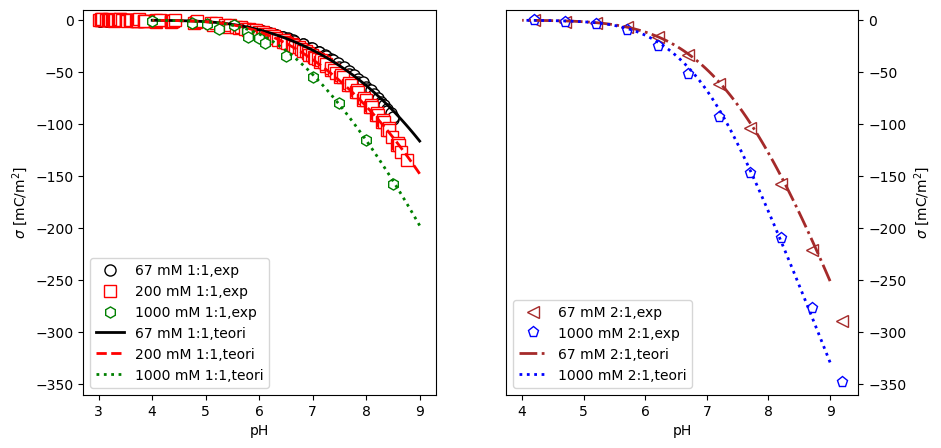

In [5]:
###BEGIN SOLUTION 
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)  #add_subplot NxM matris i detta fallet 2 rader och en kolumn, vi väljer sedan 1 figuren
ax2=fig.add_subplot(1,2,2)  #add_second axes
ax1.set_xlabel("pH",fontsize='10',labelpad=4)
ax1.set_ylabel("$\sigma$ [mC/m$^2$]",fontsize='10',labelpad=4)
ax2.set_xlabel("pH",fontsize='10',labelpad=4)
ax2.set_ylabel("$\sigma$ [mC/m$^2$]",fontsize='10',labelpad=4)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax1.plot(pH_11_67mM_exp,sigma_11_67mM_exp,marker='o',ls='',mfc='w',ms=8,c='k',label='67 mM 1:1,exp')
ax1.plot(pH_11_200mM_exp,sigma_11_200mM_exp,marker='s',ls='',mfc='w',ms=8,c='r',label='200 mM 1:1,exp')
ax1.plot(pH_11_1000mM_exp,sigma_11_1000mM_exp,marker='h',ls='',mfc='w',ms=8,c='g',label='1000 mM 1:1,exp')
ax1.plot(pH_11_67mM_teori,sigma_11_67mM_teori,marker='',ls='-',mfc='w',ms=8,c='k',lw=2,label='67 mM 1:1,teori')
ax1.plot(pH_11_200mM_teori,sigma_11_200mM_teori,marker='',ls='--',mfc='w',ms=8,c='r',lw=2,label='200 mM 1:1,teori')
ax1.plot(pH_11_1000mM_teori,sigma_11_1000mM_teori,marker='',ls=':',mfc='w',ms=8,c='g',lw=2,label='1000 mM 1:1,teori')
ax2.plot(pH_21_67mM_exp,sigma_21_67mM_exp,marker='<',ls='',mfc='w',ms=8,c='brown',label='67 mM 2:1,exp')
ax2.plot(pH_21_1000mM_exp,sigma_21_1000mM_exp,marker='p',ls='',mfc='w',ms=8,c='b',label='1000 mM 2:1,exp')
ax2.plot(pH_21_67mM_teori,sigma_21_67mM_teori,marker='',ls='-.',mfc='w',ms=8,c='brown',lw=2,label='67 mM 2:1,teori')
ax2.plot(pH_21_1000mM_teori,sigma_21_1000mM_teori,marker='',ls=':',mfc='w',ms=8,c='b',lw=2,label='1000 mM 2:1,teori')
ax1.set_ylim([-360,10])
ax2.set_ylim([-360,10])
ax1.legend(loc=3)
ax2.legend(loc=3)
plt.show()
###END SOLUTION